In [34]:
import math
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Probabilities are a way of quantifying the possibility of the occurrence of a _specific_ event or events given the set of all possible events.

Notationally, $P(E)$ means "the probability of event $E$."

# Dependence and Independence
Events $E$ and $F$ are _dependent_ if information about $E$ gives us information about the probability of $F$ occurring (or vice versa). If this is not the case, the variables are _independent_ of each other.

For independent events, the probability of both occurring is the product of the probabilities of each occurring:
$$P(E, F) = P(E)P(F)$$

## Conditional Probability
If events are not independent, we can express conditional probability ($E$ is conditional on $F$ or what is the probability that $E$ happens given that $F$ happens):
$$P(E\ |\ F) = P(E, F)\ /\ P(F)$$
which (if $E$ and $F$ are dependent) can be written as
$$P(E, F) = P(E\ |\ F)P(F)$$

When $E$ and $F$ are independent:
$$P(E\ |\ F) = P(E)$$

## Bayes's Theorem
Conditional probabilities can be "reversed":
$$P(E \text{ | } F) = P(E, F) \text{ / } P(F) = P(F \text{ | } E)P(E) \text{ / } P(F)$$
If $E$ doesn't happen:
$$P(F) = P(F, E) + P(F, \neg E)$$

Leads to Bayes's Theorem:
$$P(E\ |\ F) = P(F\ |\ E)P(E)\ /\ [P(F\ |\ E)P(E) + P(F\ |\ \neg E)P(\ \neg E)]$$

## Random Variables
A _random variable_ is one whose possible values can be placed on an associated probability distribution. The distribution refines the probabilities that the variable will take on each of the possible values.

## Continuous Distributions
Coin flips represent a _discrete distribution_, i.e., one that takes on mutually exclusive values with no "in-betweens." A _continuous distribution_ is one that allows for a full range of values along a continuum such as height or weight.

Continuous distributions use a _probability density function (pdf)_ to define probability of a value within a given range.

The pdf for the uniform distribution is:

In [1]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

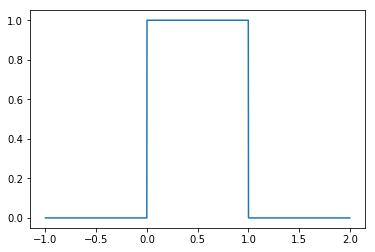

In [22]:
xs = np.arange(-1, 2, .001)
ys = [uniform_pdf(x) for x in xs]
plt.plot(xs, ys);

In [15]:
uniform_pdf(-0.01)

0

The _cumulative distribution function (cdf)_ gives the probability that a random variable is less than or equal to a certain value.

In [11]:
def uniform_cdf(x):
    """Returns probability that a value is <= x"""
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

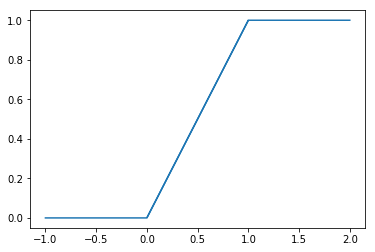

In [21]:
xs = np.arange(-1, 2, .001)
ys = [uniform_cdf(x) for x in xs]
plt.step(xs, ys);

# The Normal Distribution
The _normal distribution_ is the definitive example of a random distribution (the classic bell curve shape). It is defined by two parameters: the _mean_ $\mu$ and the _standard deviation_ $\sigma$.

The function for the distribution is:
$$f(x\ |\ \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}\ exp\bigg(-\frac{(x - \mu)^2}{2\sigma^2}\bigg)$$

In [23]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x - mu)**2 / 2 / sigma**2) / (sqrt_two_pi * sigma))

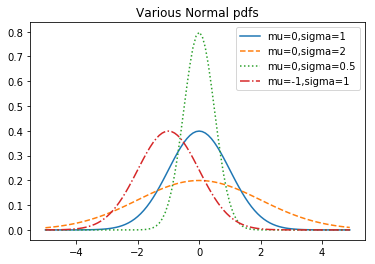

In [26]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

When $\mu = 0$ and $\sigma = 1$ we call a distribution the _standard normal distribution_.

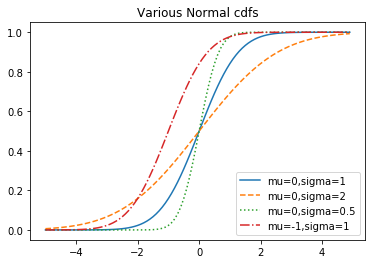

In [27]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [28]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approimate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu!= 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

# The Central Limit Theorem
The _central limit theorem_ states that the average of a large number of independent and identically distributed random variables is itself normally distributed.

So, if $x_1, ..., x_n$ are random and they have mean $\mu$ and standard deviation $\sigma$, then $\frac{1}{n}(x_1 +\ ...\ + x_n)$ will be normally distributed. An equivalent expression is $\frac{(x_1 +\ ...\ + x_n)\ -\ \mu n}{\sigma \sqrt{n}}$

A _binomial_ random variable (Binomial(n, p)) is the sum of $n$ independent Bernoulli (Bernoulli(p)) random variables. Each of the variables equals 1 with a probability of $p$ and equals 0 with a probability of $1 - p$.

In [29]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

The mean of a Bernoulli(p) variable is $p$ and its standard deviation is $\sqrt{p(1 - p)}$.

In [30]:
def plot_binomial(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x - 0.04 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial Distribution vs. Normal Approximation')

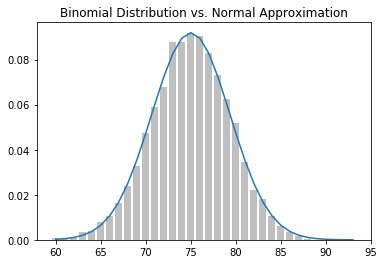

In [35]:
plot_binomial(0.75, 100, 10000)